## 策略示范

### 使用调仓列表调整股票

600466.SH Done !
603228.SH Done !
600315.SH Done !
000750.SZ Done !
002588.SZ Done !
002926.SZ Done !
603816.SH Done !
002517.SZ Done !
600366.SH Done !
001914.SZ Done !
000732.SZ Done !
600733.SH Done !
000930.SZ Done !
002093.SZ Done !
603056.SH Done !
002078.SZ Done !
600978.SH Done !
600329.SH Done !
601872.SH Done !
600058.SH Done !
601019.SH Done !
600497.SH Done !
002563.SZ Done !
600699.SH Done !
601608.SH Done !
002051.SZ Done !
002603.SZ Done !
000636.SZ Done !
000980.SZ Done !
002217.SZ Done !
600291.SH Done !
600827.SH Done !
603369.SH Done !
000829.SZ Done !
002317.SZ Done !
002509.SZ Done !
002557.SZ Done !
002212.SZ Done !
000415.SZ Done !
000860.SZ Done !
600317.SH Done !
600060.SH Done !
600500.SH Done !
300474.SZ Done !
600273.SH Done !
000681.SZ Done !
603707.SH Done !
600967.SH Done !
600415.SH Done !
002056.SZ Done !
600267.SH Done !
600161.SH Done !
002670.SZ Done !
002127.SZ Done !
002815.SZ Done !
002223.SZ Done !
002690.SZ Done !
600039.SH Done !
600126.SH Done

C:\Users\29186\AppData\Local\Temp\ipykernel_14412\1464726959.py:31: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if dt in self.trade_dates:


--------------2019-01-31 为调仓日----------
long_list ['000006.SZ', '000008.SZ', '000025.SZ', '000090.SZ', '000536.SZ', '000587.SZ', '000598.SZ', '000612.SZ', '000636.SZ', '000656.SZ', '000690.SZ', '000712.SZ', '000766.SZ', '000807.SZ', '000829.SZ', '000877.SZ', '000980.SZ', '000999.SZ', '002002.SZ', '002048.SZ', '002051.SZ', '002074.SZ', '002110.SZ', '002127.SZ', '002128.SZ', '002131.SZ', '002152.SZ', '002195.SZ', '002308.SZ', '002358.SZ', '002359.SZ', '002375.SZ', '002400.SZ', '002408.SZ', '002437.SZ', '002463.SZ', '002465.SZ', '002642.SZ', '002707.SZ', '002745.SZ', '002818.SZ', '300001.SZ', '300010.SZ', '300058.SZ', '300113.SZ', '300146.SZ', '300166.SZ', '300266.SZ', '300376.SZ', '300450.SZ', '600006.SH', '600039.SH', '600053.SH', '600056.SH', '600062.SH', '600141.SH', '600151.SH', '600158.SH', '600169.SH', '600259.SH', '600260.SH', '600280.SH', '600366.SH', '600373.SH', '600392.SH', '600393.SH', '600428.SH', '600478.SH', '600500.SH', '600525.SH', '600528.SH', '600582.SH', '600598.SH', 

C:\codeware\anaconda\envs\quant_bt\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2019-01-02
End date,2021-01-28
Total months,24
,Backtest
Annual return,23.8%
Cumulative returns,53.6%
Annual volatility,23.6%
Sharpe ratio,1.03
Calmar ratio,1.17
Stability,0.72
Max drawdown,-20.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.55,2019-04-10,2019-08-08,2020-02-18,225
1,15.46,2020-02-24,2020-03-31,2020-06-30,92
2,12.55,2020-07-13,2020-09-25,NaT,NaN
3,2.04,2019-03-12,2019-03-13,2019-03-19,6
4,0.00,2019-03-07,2019-03-07,2019-03-07,1


C:\codeware\anaconda\envs\quant_bt\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\codeware\anaconda\envs\quant_bt\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\codeware\anaconda\envs\quant_bt\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\codeware\anaconda\envs\quant_bt\lib\site-packages\pyfolio\timeseries.py:1227: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated 

Stress Events,mean,min,max
New Normal,0.10%,-8.40%,5.41%


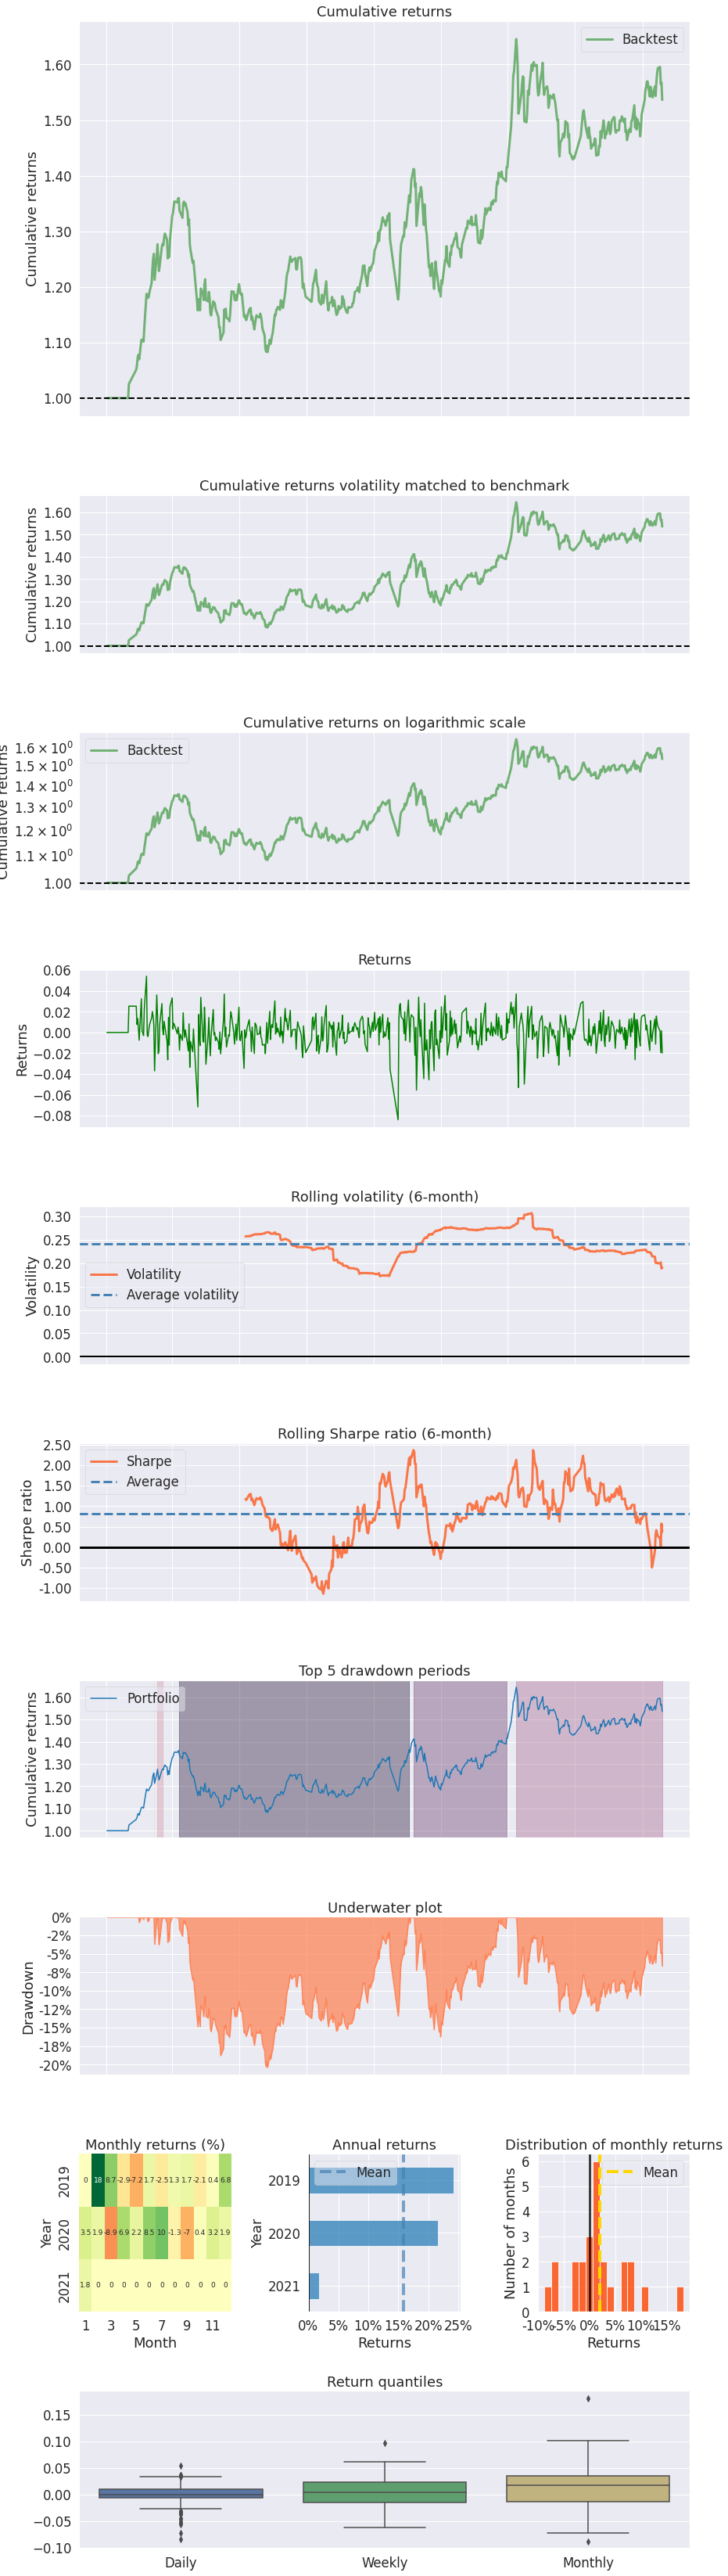

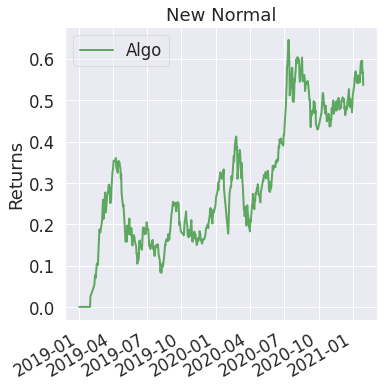

In [7]:
import backtrader as bt
import backtrader as bt
import pandas as pd
import datetime

# 回测策略
class StockSelectStrategy(bt.Strategy):
    '''多因子选股 - 基于调仓表'''
    def __init__(self):
        # 读取调仓表，表结构如下所示：
        # trade_date sec_code weight
        # 0 2019-01-31 000006.SZ 0.007282
        # 1 2019-01-31 000008.SZ 0.009783
        # ... ... ... ...
        # 2494 2021-01-28 688088.SH 0.007600
        self.buy_stock = pd.read_csv("Data/trade_info.csv", parse_dates=['trade_date'])
        # 读取调仓日期，即每月的最后一个交易日，回测时，会在这一天下单，然后在下一个交易日，以开盘价买入
        self.trade_dates = pd.to_datetime(self.buy_stock['trade_date'].unique()).tolist()
        self.order_list = [] # 记录以往订单，方便调仓日对未完成订单做处理
        self.buy_stocks_pre = [] # 记录上一期持仓
    

    def log(self, txt, dt=None):
        ''' 策略日志打印函数'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def next(self):
        dt = self.datas[0].datetime.date(0) # 获取当前的回测时间点
        # 如果是调仓日，则进行调仓操作
        if dt in self.trade_dates:
            print("--------------{} 为调仓日----------".format(dt))
            # 在调仓之前，取消之前所下的没成交也未到期的订单
            if len(self.order_list) > 0:
                for od in self.order_list:
                    self.cancel(od) # 如果订单未完成，则撤销订单
                self.order_list = [] #重置订单列表
            # 提取当前调仓日的持仓列表
            buy_stocks_data = self.buy_stock.query(f"trade_date=='{dt}'")
            long_list = buy_stocks_data['sec_code'].tolist()
            print('long_list', long_list) # 打印持仓列表
            # 对现有持仓中，调仓后不再继续持有的股票进行卖出平仓
            sell_stock = [i for i in self.buy_stocks_pre if i not in long_list]
            print('sell_stock', sell_stock) # 打印平仓列表
            if len(sell_stock) > 0:
                print("-----------对不再持有的股票进行平仓--------------")
                for stock in sell_stock:
                    data = self.getdatabyname(stock)
                    if self.getposition(data).size > 0 :
                        od = self.close(data=data)
                        self.order_list.append(od) # 记录卖出订单
            # 买入此次调仓的股票：多退少补原则
            print("-----------买入此次调仓期的股票--------------")
            for stock in long_list:
                w = buy_stocks_data.query(f"sec_code=='{stock}'")['weight'].iloc[0] # 提取持仓权重
                data = self.getdatabyname(stock)
                order = self.order_target_percent(data=data, target=w*0.95) # 为减少可用资金不足的情况，留 5% 的现金做备用
                self.order_list.append(order)
       
            self.buy_stocks_pre = long_list # 保存此次调仓的股票列表
        
    def notify_order(self, order):
        # 未被处理的订单
        if order.status in [order.Submitted, order.Accepted]:
            return
        # 已经处理的订单
        if order.status in [order.Completed, order.Canceled, order.Margin]:
            if order.isbuy():
                self.log(
                        'BUY EXECUTED, ref:%.0f, Price: %.2f, Cost: %.2f, Comm %.2f, Size: %.2f, Stock: %s' %
                        (order.ref, # 订单编号
                         order.executed.price, # 成交价
                         order.executed.value, # 成交额
                         order.executed.comm, # 佣金
                         order.executed.size, # 成交量
                         order.data._name)) # 股票名称
            else: # Sell
                self.log('SELL EXECUTED, ref:%.0f, Price: %.2f, Cost: %.2f, Comm %.2f, Size: %.2f, Stock: %s' %
                            (order.ref,
                             order.executed.price,
                             order.executed.value,
                             order.executed.comm,
                             order.executed.size,
                             order.data._name))
        

# 实例化 cerebro
cerebro = bt.Cerebro()
# 读取行情数据
daily_price = pd.read_csv("Data/daily_price.csv", parse_dates=['datetime'])
daily_price = daily_price.set_index(['datetime']) # 将datetime设置成index
# 按股票代码，依次循环传入数据
for stock in daily_price['sec_code'].unique():
    # 日期对齐
    data = pd.DataFrame(index=daily_price.index.unique()) # 获取回测区间内所有交易日
    df = daily_price.query(f"sec_code=='{stock}'")[['open','high','low','close','volume','openinterest']]
    data_ = pd.merge(data, df, left_index=True, right_index=True, how='left')
    # 缺失值处理：日期对齐时会使得有些交易日的数据为空，所以需要对缺失数据进行填充
    data_.loc[:,['volume','openinterest']] = data_.loc[:,['volume','openinterest']].fillna(0)
    data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
    data_.loc[:,['open','high','low','close']] = data_.loc[:,['open','high','low','close']].fillna(0)
    # 导入数据
    datafeed = bt.feeds.PandasData(dataname=data_,
                                   fromdate=datetime.datetime(2019,1,2),
                                   todate=datetime.datetime(2021,1,28))
    cerebro.adddata(datafeed, name=stock) # 通过 name 实现数据集与股票的一一对应
    print(f"{stock} Done !")
# 初始资金 100,000,000
cerebro.broker.setcash(100000000.0)
# 佣金，双边各 0.0003
cerebro.broker.setcommission(commission=0.0003)
# 滑点：双边各 0.0001
cerebro.broker.set_slippage_perc(perc=0.0001)
# 将编写的策略添加给大脑，别忘了 ！
cerebro.addstrategy(StockSelectStrategy)
# 回测时需要添加 PyFolio 分析器
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
result = cerebro.run()
# 借助 pyfolio 进一步做回测结果分析
pyfolio = result[0].analyzers.pyfolio # 注意：后面不要调用 .get_analysis() 方法
# 或者是 result[0].analyzers.getbyname('pyfolio')

returns, positions, transactions, gross_lev = pyfolio.get_pf_items()

import pyfolio as pf
returns, positions, transactions, gross_lev = pyfolio.get_pf_items()


pf.create_full_tear_sheet(returns)

### 基于指标交易

In [3]:
import backtrader as bt
import datetime
import pandas as pd

class PandasData_more(bt.feeds.PandasData):
    lines = ('ROE', 'EP', ) # 要添加的线
    # 设置 line 在数据源上的列位置
    params = dict(
        ROE=-1, # 设置新增指标的位置，-1表示自动按列明匹配数据
        EP=-1
        )

class StockSelectStrategy(bt.Strategy):
    params = dict(
        selnum=30, # 设置持仓股数在总的股票池中的占比，如买入表现最好的前30只股票
        rperiod=1, # 计算收益率的周期
        vperiod=6, # 计算波动率的周期，过去6个月的波动率
        mperiod=2, # 计算动量的周期，如过去2个月的收益
        reserve=0.05  # 5% 为了避免出现资金不足的情况，每次调仓都预留 5% 的资金不用于交易
    )
    def log(self, arg):
        print('{} {}'.format(self.datetime.date(), arg))

    def __init__(self):
        # 计算持仓权重，等权
        self.perctarget = (1.0 - self.p.reserve) / self.p.selnum
        # 循环计算每只股票的收益波动率因子
        self.rs = {d:bt.ind.PctChange(d, period=self.p.rperiod) for d in self.datas}
        self.vs = {d:1/(bt.ind.StdDev(ret, period=self.p.vperiod)+0.000001) for d,ret in self.rs.items()}
        # 循环计算每只股票的动量因子
        self.ms = {d:bt.ind.ROC(d, period=self.p.mperiod) for d in self.datas}
        # 将 ep 和 roe 因子进行匹配
        self.EP = {d:d.lines.EP for d in self.datas}
        self.ROE = {d:d.lines.ROE for d in self.datas}
        self.all_factors = [self.rs, self.vs, self.ms, self.EP, self.ROE]
    
        
    def next(self):
        # 在每个横截面上计算所有因子的综合排名
        stocks = list(self.datas)
        ranks = {d:0 for d in stocks}
        # 计算每个因子的rank，并进行求和
        for factor in self.all_factors:
            stocks.sort(key=lambda x: factor[x][0], reverse=True)
            # print({x._name:factor[x][0] for x in stocks})
            ranks = {d:i+ranks[d] for d,i in zip(stocks, range(1,len(stocks)+1))}
            # print({d._name:rank for d,rank in ranks.items()})

        # 对各因子rank求和后的综合值进行最后的排序,最大综合值排最前面
        # 买入 动量、ep、roe 高；波动率低的股票
        ranks = sorted(ranks.items(), key=lambda x: x[1], reverse=False)
        # print({i._name:rank for (i,rank) in ranks})

        # 选取前 self.p.selnum 只股票作为持仓股
        rtop = dict(ranks[:self.p.selnum])

        # 剩余股票将从持仓中剔除（如果在持仓里的话）
        rbot = dict(ranks[self.p.selnum:])

        # 提取有仓位的股票
        posdata = [d for d, pos in self.getpositions().items() if pos]

        # 删除不在继续持有的股票，进而释放资金用于买入新的股票
        for d in (d for d in posdata if d not in rtop):
            self.log('Leave {} - Rank {:.2f}'.format(d._name, rbot[d]))
            self.order_target_percent(d, target=0.0)

        # 对下一期继续持有的股票，进行仓位调整
        for d in (d for d in posdata if d in rtop):
            self.log('Rebal {} - Rank {:.2f}'.format(d._name, rtop[d]))
            self.order_target_percent(d, target=self.perctarget)
            del rtop[d]

        # 买入当前持仓中没有的股票
        for d in rtop:
            self.log('Enter {} - Rank {:.2f}'.format(d._name, rtop[d]))
            self.order_target_percent(d, target=self.perctarget)
        

# 实例化 cerebro
cerebro = bt.Cerebro()
# 读取行情数据
month_price = pd.read_csv("./data/month_price.csv", parse_dates=['datetime'])
month_price = month_price.set_index(['datetime']).sort_index() # 将datetime设置成index
# 按股票代码，依次循环传入数据
for stock in month_price['sec_code'].unique():
    # 日期对齐
    data = pd.DataFrame(index=month_price.index.unique()) # 获取回测区间内所有交易日
    df = month_price.query(f"sec_code=='{stock}'")[['open','high','low','close','volume','openinterest']]
    data_ = pd.merge(data, df, left_index=True, right_index=True, how='left')
    # 缺失值处理：日期对齐时会使得有些交易日的数据为空，所以需要对缺失数据进行填充
    data_.loc[:,['volume','openinterest']] = data_.loc[:,['volume','openinterest']].fillna(0)
    data_.loc[:,['open','high','low','close','EP','ROE']] = data_.loc[:,['open','high','low','close']].fillna(method='pad')
    data_.loc[:,['open','high','low','close','EP','ROE']] = data_.loc[:,['open','high','low','close']].fillna(0.0000001)
    # 导入数据
    datafeed = PandasData_more(dataname=data_,
                               fromdate=datetime.datetime(2019,1,31),
                               todate=datetime.datetime(2021,8,31),
                               timeframe=bt.TimeFrame.Months) # 将数据的时间周期设置为月度
    cerebro.adddata(datafeed, name=stock) # 通过 name 实现数据集与股票的一一对应
    print(f"{stock} Done !")
# 初始资金 100,000,000
cerebro.broker.setcash(100000000.0)
# 佣金，双边各 0.0003
cerebro.broker.setcommission(commission=0.0003)
# 滑点：双边各 0.0001
cerebro.broker.set_slippage_perc(perc=0.0001)
# 将编写的策略添加给大脑，别忘了 ！
cerebro.addstrategy(StockSelectStrategy)
# 返回收益率时序
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')
result = cerebro.run()
# 得到收益率时序
ret = pd.Series(result[0].analyzers._TimeReturn.get_analysis())

######### 注意 #########
# PyFolio 分析器返回的收益也是月度收益，但是绘制的各种收益分析图形会有问题，有些图绘制不出来


FileNotFoundError: [Errno 2] No such file or directory: './data/month_price.csv'

In [ ]:
a